In [9]:
import tensorflow as tf
import pandas as pd
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [5]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [10]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.712108,0.284698,1
1,-0.678716,0.207274,1
2,-0.866026,0.343651,1
3,-0.517648,0.620599,1
4,0.454089,-0.890466,0


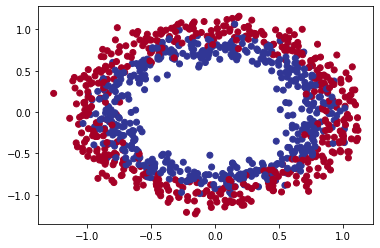

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [13]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [11]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # for binary classification 
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_7.fit(X, y, epochs=100, verbose=0)

2022-05-08 19:29:18.003163: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


32/32 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.8120
doing binary classifcation...


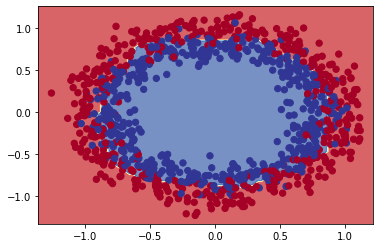

In [14]:
model_7.evaluate(X, y)
plot_decision_boundary(model_7, X, y)

In [41]:
X_train, y_train = X[:800], y[:800] 
X_test, y_test = X[800:], y[800:] 


In [57]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid") # for binary classification 
])
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_8.fit(X_train, y_train, epochs=25, verbose =0)

In [58]:
# loss: 0.3711 - accuracy: 0.8350
# loss: 0.4071 - accuracy: 0.8550
model_8.evaluate(X_test, y_test)
#plot_decision_boundary(model_8, X_train, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8550


[0.4070979356765747, 0.8550000190734863]

In [87]:
X_train2 =  X_train * X_train
X_test2 = X_test * X_test

In [89]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid") # for binary classification 
])
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_9.fit(X_train2, y_train, epochs=25, verbose =0)

In [91]:
model_9.evaluate(X_test2, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.3679 - accuracy: 0.8650


[0.3678768277168274, 0.8650000095367432]

doing binary classifcation...
doing binary classifcation...


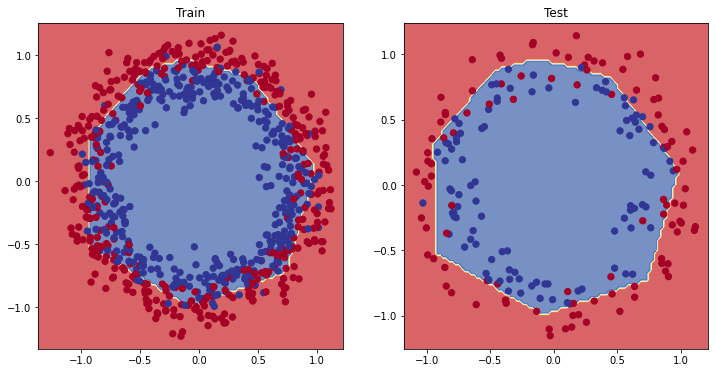

In [92]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)

doing binary classifcation...
doing binary classifcation...


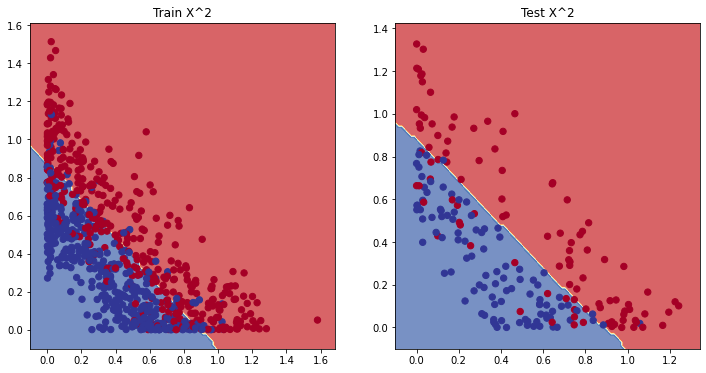

In [95]:
# plot for linear input =  X^2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train X^2")
plot_decision_boundary(model_9, X=X_train2, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test X^2")
plot_decision_boundary(model_9, X=X_test2, y=y_test)
plt.show()